# *Analysis and Comparison of Linear and Polynomial Regression Models for Predicting Student Exam Scores*
The primary aim of this project is to predict student exam scores based on the number of hours studied using two machine learning models: Linear Regression and Polynomial Regression (degree 2). By evaluating and comparing the performance of these models using metrics such as R² Score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE), the project seeks to determine which model better captures the relationship between study hours and exam performance.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [81]:
df = pd.read_csv(r"C:\Users\hp\Downloads\StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [82]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

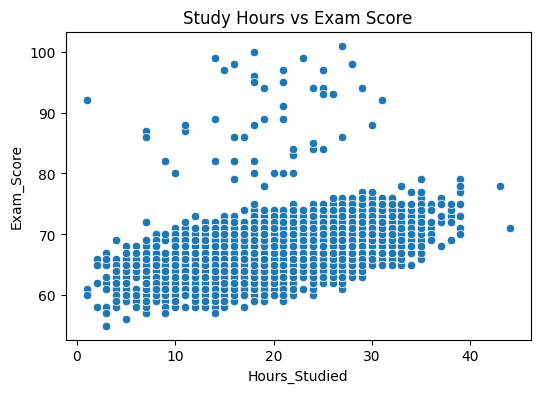

In [54]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Hours_Studied'], y=df['Exam_Score'])
plt.title("Study Hours vs Exam Score")
plt.show()

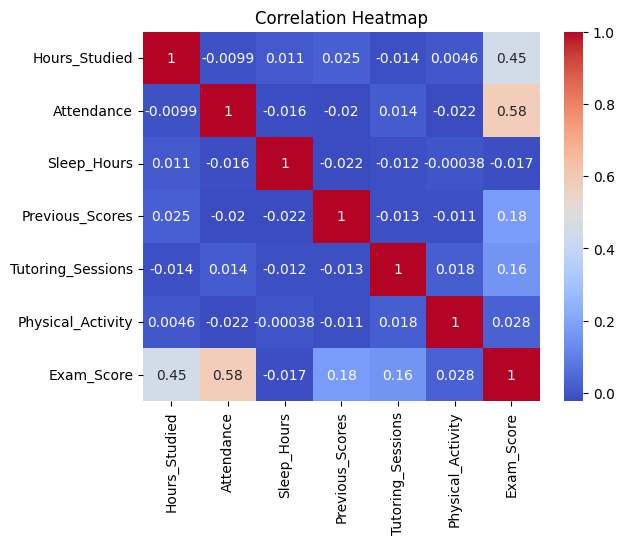

In [27]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Linear Regression Model
### Prepare Data for Linear Regression
##### Train a Linear Regression model on the training data and make predictions on the test set.

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_linear = lin_reg.predict(X_test)

In [83]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

### Calculate evaluation metrics (MAE, MSE, R²) to assess the Linear Regression model's performance.

In [57]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

linear_metrics = {
    'MAE': mae_linear,
    'MSE': mse_linear,
    'R2': r2_linear
}

print("Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R² Score: {r2_linear:.2f}")

Linear Regression Metrics:
Mean Absolute Error (MAE): 2.45
Mean Squared Error (MSE): 10.86
R² Score: 0.23


## Visualize Linear Regression Fit
### Plot the Linear Regression fit against the actual data points to visualize its performance.

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


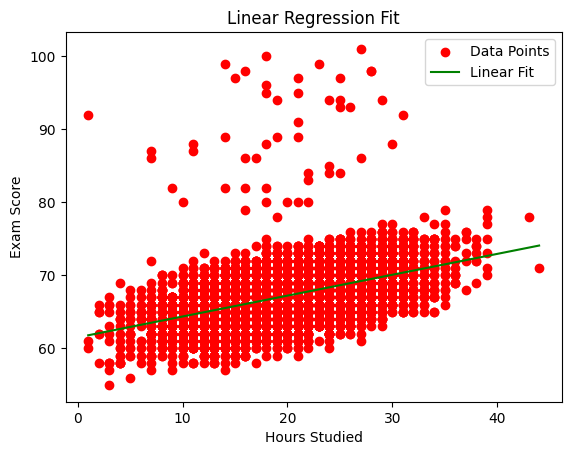

In [58]:
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(np.sort(X.values, axis=0), lin_reg.predict(np.sort(X.values, axis=0).reshape(-1, 1)), color='green', label='Linear Fit')
plt.title('Linear Regression Fit')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

## Polynomial Regression Model
### Plot the Linear Regression fit against the actual data points to visualize its performance.

In [59]:

X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [60]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Make predictions
y_pred_poly = poly_reg.predict(X_poly_test)

## Evaluate Polynomial Regression Model
### Calculate evaluation metrics (MAE, MSE, R²) to assess the Polynomial Regression model's performance.

In [61]:
# Calculate metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Store metrics
poly_metrics = {
    'MAE': mae_poly,
    'MSE': mse_poly,
    'R2': r2_poly
}

# Print metrics
print("Polynomial Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"R² Score: {r2_poly:.2f}")

Polynomial Regression Metrics:
Mean Absolute Error (MAE): 2.44
Mean Squared Error (MSE): 10.84
R² Score: 0.23


## Visualize Polynomial Regression Fit
### Plot the Polynomial Regression fit (degree 2) against the actual data points to visualize its performance.

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


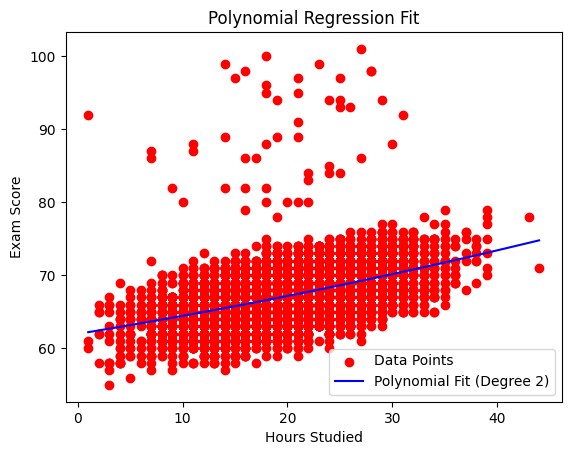

In [62]:
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(np.sort(X.values, axis=0), poly_reg.predict(poly.transform(np.sort(X.values, axis=0).reshape(-1, 1))), color='blue', label='Polynomial Fit (Degree 2)')
plt.title('Polynomial Regression Fit')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

## Visualize Model Fits
### Plot the fits of both models to visually compare how well they model the relationship between Hours Studied and Exam Score.

In [63]:
metrics_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R² Score'],
    'Linear Regression': [linear_metrics['MAE'], linear_metrics['MSE'], linear_metrics['R2']],
    'Polynomial Regression': [poly_metrics['MAE'], poly_metrics['MSE'], poly_metrics['R2']]
})

print("\nModel Comparison:")
print(metrics_df)


Model Comparison:
                      Metric  Linear Regression  Polynomial Regression
0  Mean Absolute Error (MAE)           2.447569               2.444780
1   Mean Squared Error (MSE)          10.855921              10.844988
2                   R² Score           0.231987               0.232760


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


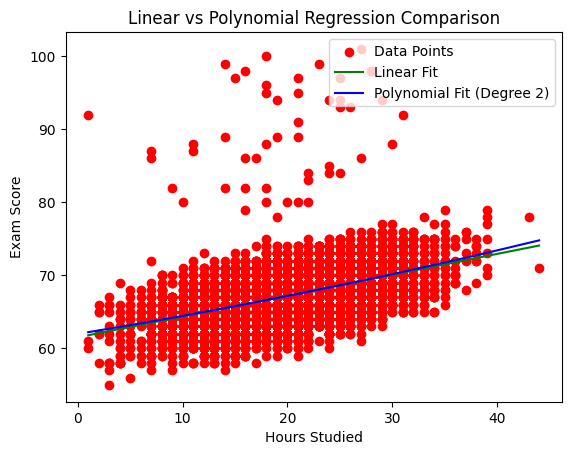

In [65]:

plt.scatter(X, y, color='red', label='Data Points')

X_sorted = np.sort(X.values, axis=0)

# Linear Regression line
plt.plot(X_sorted, lin_reg.predict(X_sorted.reshape(-1, 1)), color='green', label='Linear Fit')

# Polynomial Regression line
plt.plot(X_sorted, poly_reg.predict(poly.transform(X_sorted.reshape(-1, 1))), color='blue', label='Polynomial Fit (Degree 2)')

plt.title('Linear vs Polynomial Regression Comparison')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()